# Project Title - EPL202021-Analysis

TODO - In this project we are going to analyse data of English Premier League 2020-21. To analyse data we are going to use different in-built libraries from python like numpy, pandas, matplotlib, seaborn etc.. Here seaborn and matplotlib are used for analysing data by visulaization and pandas are the main libraries with which we can read the data present in a csv(comma-seperated-values) file and we can clean up the data and write back to the csv file using inbuilt functions. And after that we will be asking some questions to gain knowledge about the premier league data and evntually answer those questions with good explaination. The Epl2020-21 dataset contains data of players and their performance in the season. The dataset was taken from kaggle .


## Downloading the Dataset

**TODO** - Firstly we have to find a dataset to be analysed and download the dataset using opendatasets library in python. Then check if it is present in the direcory or not using os.listdir from os library. Then read the file using pandas.

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/rajatrc1705/english-premier-league202021' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sreeharsha213
Your Kaggle Key: ········


100%|██████████| 15.8k/15.8k [00:00<00:00, 12.8MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './english-premier-league202021'

In [5]:
import os
os.listdir(data_dir)

['EPL_20_21.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "epl202021-analysis" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sreeharsha2130/epl202021-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sreeharsha2130/epl202021-analysis


'https://jovian.ai/sreeharsha2130/epl202021-analysis'

## Data Preparation and Cleaning

**TODO** - Firtly we read the csv file using pandas library and explore the data using different functions, and start cleaning the data if there are any mis-calculations or data entry errors  and perform some additional steps.



> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [10]:
import pandas as pd
import numpy as np

In [11]:
#loading csv file into pandas
epl_df=pd.read_csv('english-premier-league202021/EPL_20_21.csv')

In [12]:
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [13]:
epl_df.shape

(532, 18)

In [14]:
total_time_played=epl_df.Mins.sum()/60
print('Total time played by players in the 2020-21 season of EPL is {} hrs'.format(total_time_played))

Total time played by players in the 2020-21 season of EPL is 12514.8 hrs


In [15]:
max_Perc_Passes_Completed=epl_df.Perc_Passes_Completed.max()
players_with_full_pass_completions=epl_df[epl_df['Perc_Passes_Completed'].eq(max_Perc_Passes_Completed)]
print('No. of players who have 100 percent pass completion is {}.'.format(players_with_full_pass_completions.shape[0]))

No. of players who have 100 percent pass completion is 12.


In [16]:
epl_df=epl_df[epl_df['Perc_Passes_Completed']>0]
epl_df.drop(['xA','xG','Starts'],axis='columns')

,Name,Club,Nationality,Position,Age,Matches,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,2890,6,5,1881,82.3,1,1,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,2745,0,0,1007,84.6,0,0,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,2602,6,8,826,77.2,0,0,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,2286,3,5,1806,78.6,0,0,3,0
4,Reece James,Chelsea,ENG,DF,20,32,2373,1,2,1987,85.0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,Daniel Jebbison,Sheffield United,ENG,FW,17,4,284,1,0,34,70.6,0,0,0,0
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,296,0,0,50,80.0,0,0,0,0
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,180,0,0,77,77.9,0,0,0,0
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,12,0,0,3,100.0,0,0,0,0


In [17]:
#(used to split rows for the given comma seperated values in a column with changing index values)
'''(epl_df.set_index(['Name', 'Club', 'Nationality', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards']).apply(lambda x: x.str.split(',').explode()).reset_index())  
       '''
#players who can play 2 positions
players_playing_2pos_df=epl_df[epl_df.Position.apply(len)>2]
players_playing_2pos_df.drop(['xA','xG','Starts'],axis='columns')

,Name,Club,Nationality,Position,Age,Matches,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,2890,6,5,1881,82.3,1,1,2,0
12,Christian Pulisic,Chelsea,USA,"FW,MF",21,27,1738,4,2,690,80.0,0,0,2,0
13,Kai Havertz,Chelsea,GER,"MF,FW",21,27,1520,4,3,765,86.1,0,0,2,0
15,Hakim Ziyech,Chelsea,MAR,"FW,MF",27,23,1172,2,3,734,74.7,0,0,3,0
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,1059,2,3,659,82.2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,David McGoldrick,Sheffield United,IRL,"FW,MF",32,35,2397,8,1,938,74.5,0,0,7,0
513,Ethan Ampadu,Sheffield United,WAL,"DF,MF",19,25,2089,0,0,1064,80.5,0,0,3,0
515,Ben Osborn,Sheffield United,ENG,"MF,DF",25,24,1604,1,0,839,79.0,0,0,1,0
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,296,0,0,50,80.0,0,0,0,0


In [18]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sreeharsha2130/epl202021-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sreeharsha2130/epl202021-analysis


'https://jovian.ai/sreeharsha2130/epl202021-analysis'

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [20]:
epl_df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,25.603810,19.780952,15.923810,1430.213333,1.878095,1.304762,727.308571,78.865333,0.194286,0.238095,0.114800,0.073619,2.142857,0.091429
std,4.250189,11.725536,11.860428,1037.264830,3.353305,2.103812,630.078879,9.432467,0.856255,0.981934,0.148577,0.090277,2.270910,0.295033
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,28.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,10.000000,5.000000,490.000000,0.000000,0.000000,199.000000,73.800000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1350.000000,1.000000,0.000000,583.000000,79.300000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2332.000000,2.000000,2.000000,1141.000000,84.800000,0.000000,0.000000,0.160000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [21]:
a=epl_df[epl_df.Goals>10]
b=a[a.Assists>4]
c=epl_df[epl_df.Yellow_Cards>5]

In [22]:

#epl_df.Goals.sum()

In [23]:
clubs=epl_df['Club'].unique()
top_scorer_df=pd.DataFrame()
for i in clubs:
    x=epl_df[epl_df.Club==i]
    max_goals=x['Goals'].max()
    x=x[x.Goals==max_goals].head(1)
    top_scorer_df=pd.concat([x,top_scorer_df],ignore_index=True)


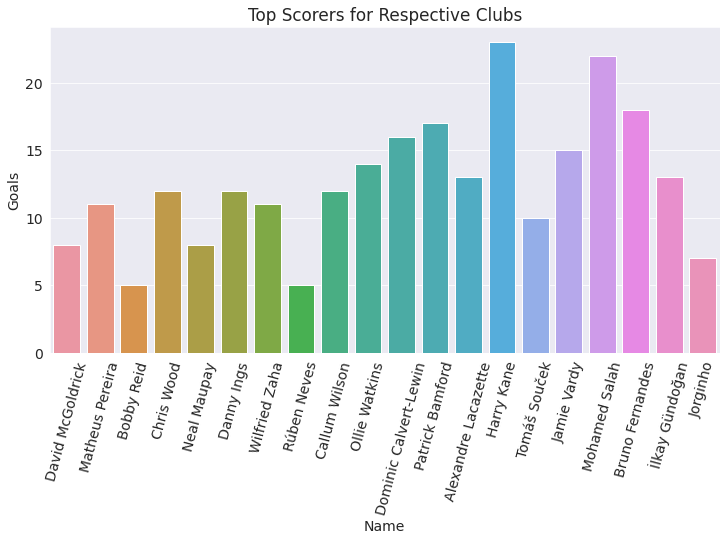

In [24]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top Scorers for Respective Clubs')
sns.barplot(x=top_scorer_df.Name, y=top_scorer_df.Goals);

**TODO** - The graph Shows the discipline players show on the field, as the total cards count increases the players commit lots of fouls in a match 

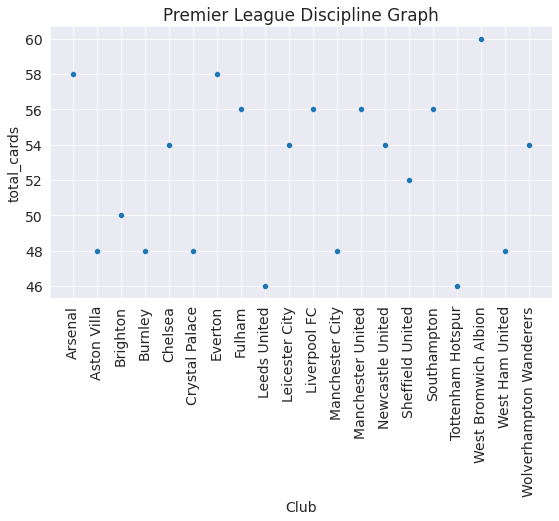

In [25]:
cards_df=epl_df.groupby(['Club'],as_index=False)[['Yellow_Cards','Red_Cards']].count()
cards_df['total_cards']=cards_df['Yellow_Cards']+cards_df['Red_Cards']
plt.xticks(rotation=90)
plt.title('Premier League Discipline Graph')
sns.scatterplot(x=cards_df.Club, y=cards_df.total_cards);

**TODO** - Heatmap to show the data of clubs and the number of goals scored by each club

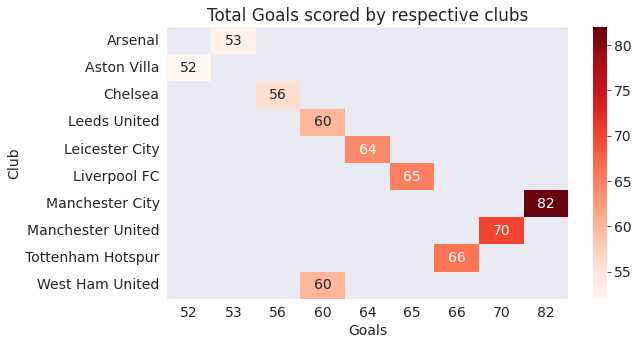

In [26]:
goal_df=epl_df.groupby(['Club'],as_index=False)['Goals'].sum()
goals_df=goal_df.sort_values(['Goals'], ascending=[False]).head(10)
goals_df['count']=goals_df['Goals']
df_p = pd.pivot_table(goals_df,'Goals','Club','Goals')
plt.title("Total Goals scored by respective clubs")
sns.heatmap(df_p, annot=True, cmap='Reds');



**TODO** - here we create a dataframe of players playing various positions and the number of goals they scored from that position. Then we visualize the data using line plot and we can tell from which position a player can score more goals.

In [27]:
goals_by_gk=(epl_df[epl_df.Position=='GK']).Goals.sum()
goals_by_fw=(epl_df[epl_df.Position=='FW']).Goals.sum()
goals_by_mf=(epl_df[epl_df.Position=='MF']).Goals.sum()
goals_by_df=(epl_df[epl_df.Position=='DF']).Goals.sum()
goals_by_players_playing2pos=epl_df.Goals.sum()-(goals_by_gk+goals_by_fw+goals_by_mf+goals_by_df)
df=pd.DataFrame({'position':['forward','mid-fielder','defender','goal_keeper','two_pos'],'num_of_goals':[goals_by_fw,goals_by_mf,goals_by_df,goals_by_gk,goals_by_players_playing2pos]})


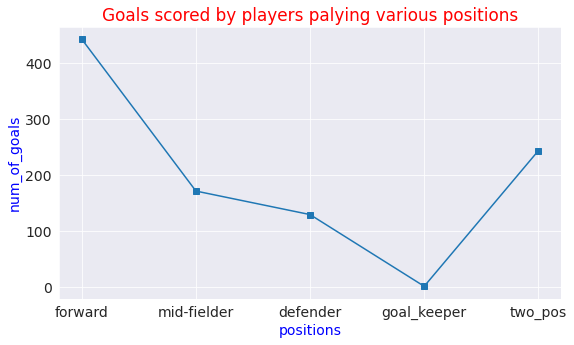

In [28]:
plt.title('Goals scored by players palying various positions',c='r')
plt.xlabel('positions',c='b')
plt.ylabel('num_of_goals',c='b')
plt.plot(df.position,df.num_of_goals,marker='s');

**TODO** - This graph shows how many players have completed what percentage of passes in the entire season 2020-21 of english premier league(EPL).

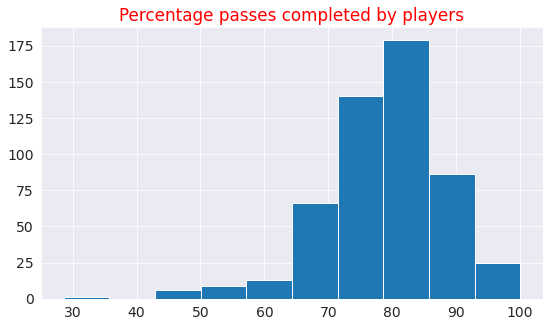

In [29]:
plt.title("Percentage passes completed by players",c='r')
plt.hist(epl_df.Perc_Passes_Completed,bins=10);

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

/tmp/ipykernel_88/3688899368.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(df.position,rotation=90)
/tmp/ipykernel_88/3688899368.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(cards_df.Club,rotation=90)
/tmp/ipykernel_88/3688899368.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(top_scorer_df.Name,rotation=90)


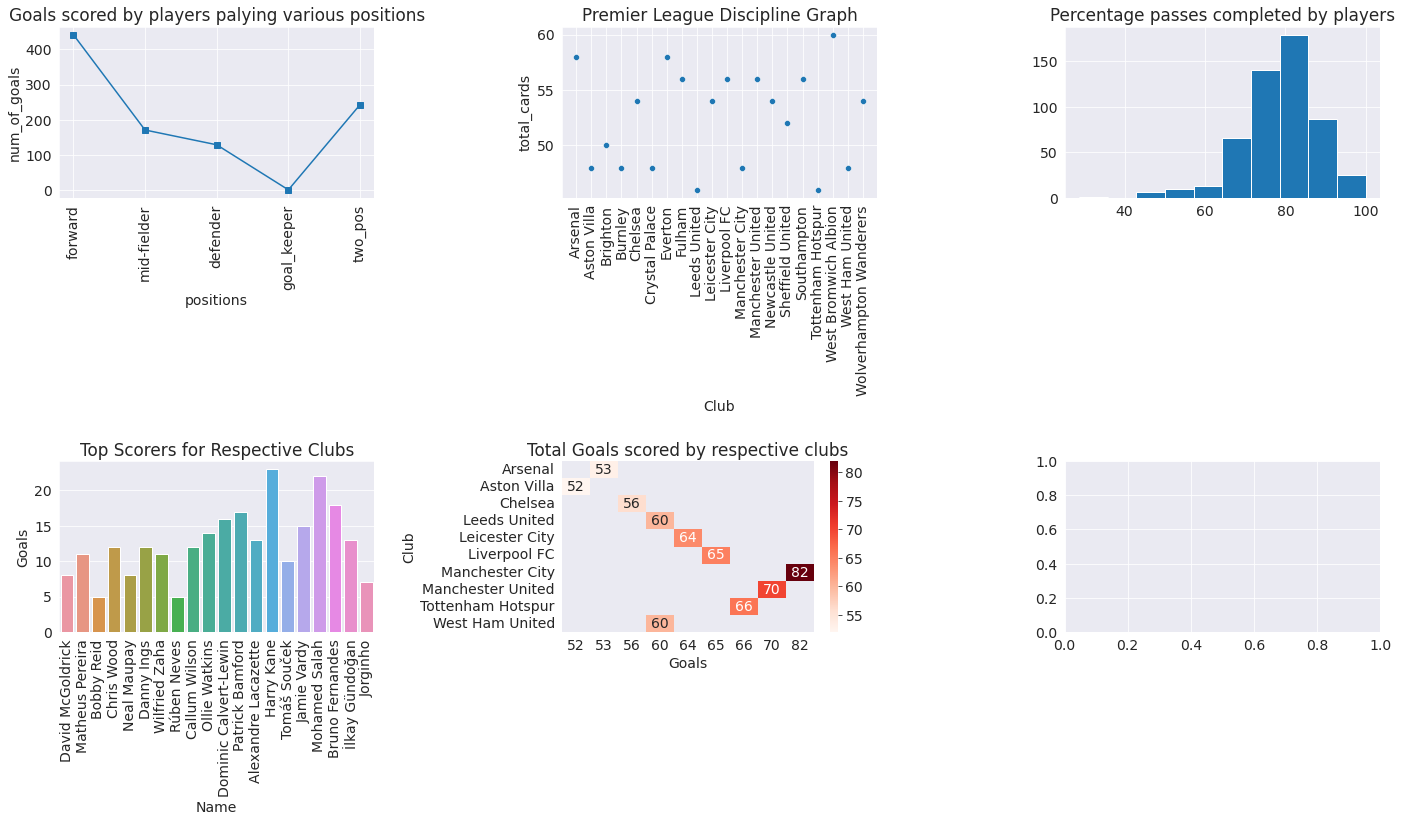

In [54]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Use the axes for plotting
axes[0,0].plot(df.position,df.num_of_goals,marker='s')
axes[0,0].set_xticklabels(df.position,rotation=90)
axes[0,0].set_xlabel('positions')
axes[0,0].set_ylabel('num_of_goals')
axes[0,0].set_title('Goals scored by players palying various positions')


# Pass the axes into seaborn
axes[0,1].set_title('Premier League Discipline Graph')
axes[0,1].set_xticklabels(cards_df.Club,rotation=90)
sns.scatterplot(x=cards_df.Club, y=cards_df.total_cards,ax=axes[0,1]);

# Use the axes for plotting
axes[0,2].set_title('Percentage passes completed by players')
axes[0,2].hist(epl_df.Perc_Passes_Completed,bins=10);

# Pass the axes into seaborn
axes[1,0].set_xticklabels(top_scorer_df.Name,rotation=90)   
axes[1,0].set_title('Top Scorers for Respective Clubs')
sns.barplot(x=top_scorer_df.Name, y=top_scorer_df.Goals, ax=axes[1,0]);

# Pass the axes into seaborn
axes[1,1].set_title('Total Goals scored by respective clubs')
sns.heatmap(df_p, annot=True, cmap='Reds', ax=axes[1,1]);


plt.tight_layout(pad=2);

Let us save and upload our work to Jovian before continuing

In [55]:
import jovian

In [56]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sreeharsha2130/epl202021-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sreeharsha2130/epl202021-analysis


'https://jovian.ai/sreeharsha2130/epl202021-analysis'

## Asking and Answering Questions

TODO -  Let's ask some specific questions and try to answer them using data frame operations and visualizations.




> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: TODO - Who are the Top 5 goal scorers of EPL2020-21?
>- To answer this question we first have to sort the epl2020-21 data in descending form of goals and find the first five from that data.

In [170]:
top_five_goal_scorers=epl_df.sort_values(['Goals'],ascending=False).head(10)

In [171]:
top_five_goal_scorers[['Name','Club','Matches','Goals']]
names=np.array(top_five_goal_scorers['Name'])
goals=np.array(top_five_goal_scorers['Goals'])

In [172]:
print('The Top 5 goal scorers of EPL2020-21 are \n1.{}({}), \n2.{}({}), \n3.{}({}), \n4.{}({}), \n5.{}({}).'.format(names[0],goals[0],names[1],goals[1],names[2],goals[2],names[3],goals[3],names[4],goals[4]))

The Top 5 goal scorers of EPL2020-21 are 
1.Harry Kane(23), 
2.Mohamed Salah(22), 
3.Bruno Fernandes(18), 
4.Son Heung-min(17), 
5.Patrick Bamford(17).


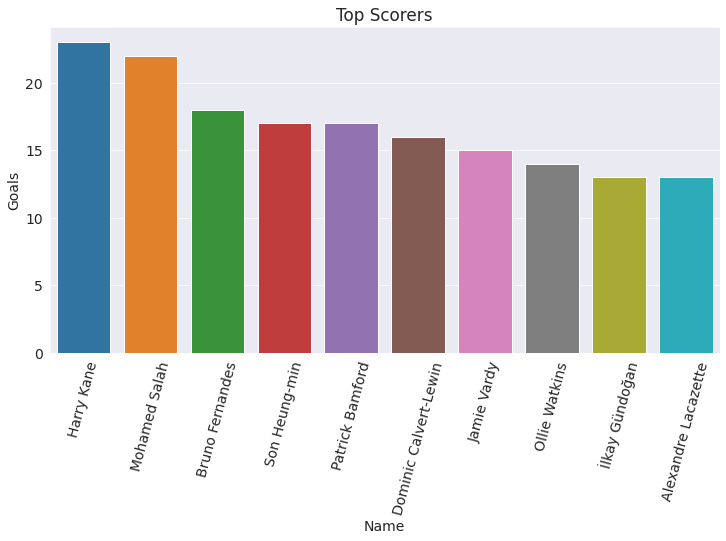

In [173]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top Scorers')
sns.barplot(x=top_five_goal_scorers.Name, y=top_five_goal_scorers.Goals);

#### Q2: TODO - Who are the best two emerging players of epl2020-21?
>- Firstly we check for the players who are teenage(<20) and find the number of goals they scored and check their performances accordingly ad if they are capable for good performances according to the data then we say them as emerging players.

In [160]:
teen_players=epl_df[epl_df['Age']<20]
emerging_players=teen_players.sort_values(['Goals'],ascending=False).head(10)
n=np.array(emerging_players.Name)
c=np.array(emerging_players.Club)
a=np.array(emerging_players.Age)

In [161]:
print('The 2 emerging players of the season are \n1.{}(club: {}, age: {}) and \n2.{}(club: {}, age: {})'.format(n[0],c[0],a[0],n[1],c[1],a[1]))

The 2 emerging players of the season are 
1.Mason Greenwood(club: Manchester United, age: 18) and 
2.Bukayo Saka(club: Arsenal, age: 18)


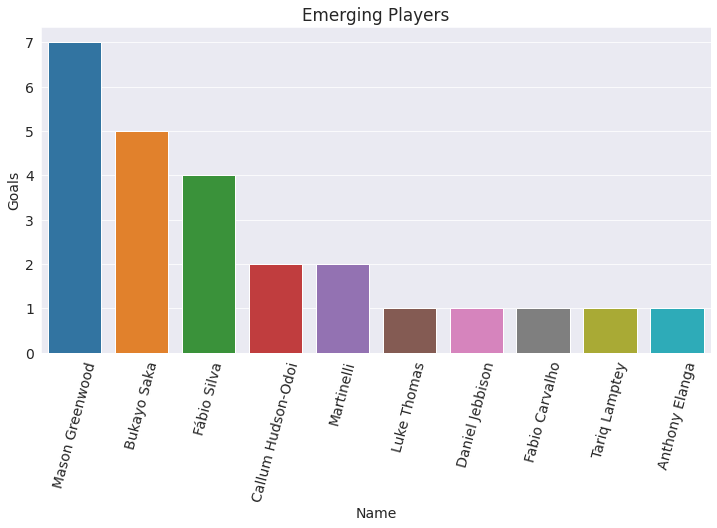

In [175]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Emerging Players')
sns.barplot(x=emerging_players.Name, y=emerging_players.Goals);

#### Q3: TODO - Find the number of players from Portugal playing for Wolverhampton Wanderers?
>- T o get the solution first we have to group the data with players respective clubs and nationality and then find their name and hence we can find the count.

In [91]:
a=epl_df.groupby(['Club','Nationality'])['Name'].count()
a=epl_df[epl_df.Nationality=='POR']
b=a[a.Club=='Wolverhampton Wanderers']
players_count=b.Name.count()


In [92]:
print('Their are {} players from Portugal playing for Wolverhampton Wanderers.'.format(players_count))

Their are 9 players from Portugal playing for Wolverhampton Wanderers.


#### Q4: TODO - How many players are comfortable playing more than one position? From that who is capable of scoring maximum goals, find the number of goals scored by him?
>- First find the number of players who can play more than one position by using functions in pandas and sort them by the number of goals scored by each player in descending order.

In [100]:
#Here len of position string is 2 for players playing only one position(len(FW)==2), so we use len>2 for players who play more than one position
players_playing_2pos_df=epl_df[epl_df.Position.apply(len)>2]
num_players_playing_2pos_df=players_playing_2pos_df.Name.count()

In [112]:
capable_2pos_player=players_playing_2pos_df.sort_values('Goals',ascending=False).head(1)
n=np.array(capable_2pos_player.Name)[0]
g=np.array(capable_2pos_player.Goals)[0]
a=np.array(capable_2pos_player.Assists)[0]
p=np.array(capable_2pos_player.Perc_Passes_Completed)[0]

In [114]:
print('There are {} players who can play more than one position. \nFrom them {} is capable of scoring more goals then any others in this category \nwith {} goals and {} assists, and a pass completion of {}% '.format(num_players_playing_2pos_df,n,g,a,p))

There are 122 players who can play more than one position. 
From them Matheus Pereira is capable of scoring more goals then any others in this category 
with 11 goals and 6 assists, and a pass completion of 71.8% 


#### Q5: TODO - Who among the players who played maximum numbers of matches and got minimum number of cards(red or yellow)? If more than one player has the same number of minimum cards then find the player who was in the field for maximum time.(exclude goal keepers).
>- Find maximum numbers of matches played by any of the player and then from them check who got less number of cards.

In [120]:
max_matches=epl_df.Matches.max()

In [156]:
max_matches_players=epl_df[epl_df.Matches==max_matches]
num_max_matches_players=max_matches_players.Name.count()
min_cards=max_matches_players.Yellow_Cards.min()
min_cards_players=max_matches_players[max_matches_players.Yellow_Cards==min_cards]

# find the indexes of data with position GK and remove them.
idx=min_cards_players[min_cards_players.Position=='GK'].index
for a in idx:
    min_cards_players=min_cards_players.drop(a)
n_or_c=np.array(min_cards_players[['Name','Yellow_Cards']])

In [157]:
print('Out of {} players who played maximum number of matches, only {} got minimum number of cards with count:{}. \nWhich shows the sports man spirit of a player. kuddos to Mr.{}!!!!!.'.format(num_max_matches_players,n_or_c[0][0],n_or_c[0][1],n_or_c[0][0]))

Out of 16 players who played maximum number of matches, only Jarrod Bowen got minimum number of cards with count:0. 
Which shows the sports man spirit of a player. kuddos to Mr.Jarrod Bowen!!!!!.


In [180]:
import jovian

In [181]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sreeharsha2130/epl202021-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sreeharsha2130/epl202021-analysis


'https://jovian.ai/sreeharsha2130/epl202021-analysis'

## Inferences and Conclusion

**TODO** - We've drawn many inferences from the Data. Here's a summary of a few of them:


>- Based on the data and some visualizations, we can infer that the data is about the players and their performances in the English premier league 2020-21. However, we don't deal with the winning matches and manager's role and other strategies related to the league.

>- From the data we got to know that their are many young players like Mason Greenwood(club: Manchester United, age: 18) and 
Bukayo Saka, who all are very much into the game with their performances. 

>- From the data we can say that their are few players who are very much consistent with their performances and are unbeatable, according to their time in the field, pass completion percentage and goals scored and assisted .

>- A significant percentage of players play in more than one position, which can be a great way to dominate in the field, especially when you're experienced.

>- Harry Kane & Mohamed Salah are the top scorers of the season 2020-21 of EPL , closely followed by Bruno Fernandes and Son Heung-min.

>- Manchester City is the team which scored maximum number of goals in the season with 82 goals - since it has many players who perform consistently in their respective positions.

>- Players from every team have played an average of 1430 minutes in the whole season on EPL, with a maximum number of 38 matches in a season.

>- You can learn and start playing football professionally at any age. You're likely to have a long and fulfilling career if you also enjoy playing at an early age.

In [182]:
import jovian

In [183]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sreeharsha2130/epl202021-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sreeharsha2130/epl202021-analysis


'https://jovian.ai/sreeharsha2130/epl202021-analysis'

## References and Future Work

**TODO** - Check out the following resources to learn more about the dataset and tools used in this notebook:

>- English Premier league2020-21: https://www.kaggle.com/rajatrc1705/english-premier-league202021
>- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
>- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
>- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
>- opendatasets Python library: https://github.com/JovianML/opendatasets

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [ ]:
import jovian

In [ ]:
jovian.commit()